In [1]:
import librosa as l

# Tempo, Beat Frames, Beat Frames

In [2]:
# Beat tracking example
import librosa

#2.Load the audio as a waveform `y`
#Store the sampling rate as `sr`

y, sr = librosa.load('music.wav')

# 3. Run the default beat tracker

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

#4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 172.27 beats per minute


In [3]:
print(beat_times)

[9.28798186e-02 4.17959184e-01 7.43038549e-01 1.09133787e+00
 1.41641723e+00 1.76471655e+00 2.11301587e+00 2.46131519e+00
 2.80961451e+00 3.15791383e+00 3.50621315e+00 3.85451247e+00
 4.20281179e+00 4.55111111e+00 4.89941043e+00 5.24770975e+00
 5.59600907e+00 5.94430839e+00 6.29260771e+00 6.64090703e+00
 6.98920635e+00 7.33750567e+00 7.68580499e+00 8.03410431e+00
 8.38240363e+00 8.73070295e+00 9.05578231e+00 9.40408163e+00
 9.75238095e+00 1.01006803e+01 1.04489796e+01 1.07972789e+01
 1.11687982e+01 1.15170975e+01 1.18421769e+01 1.21904762e+01
 1.25387755e+01 1.28870748e+01 1.32353741e+01 1.35604535e+01
 1.39319728e+01 1.42802721e+01 1.46285714e+01 1.49768707e+01
 1.53251701e+01 1.56734694e+01 1.59985488e+01 1.63468481e+01
 1.66951474e+01 1.70898866e+01 1.74381859e+01 1.77632653e+01
 1.80883447e+01 1.84134240e+01 1.87385034e+01 1.90635828e+01
 1.93886621e+01 1.97369615e+01 2.01084807e+01 2.04800000e+01
 2.08515193e+01 2.12462585e+01 2.15945578e+01 2.19428571e+01
 2.23143764e+01 2.268589

In [4]:
print(y)

[0. 0. 0. ... 0. 0. 0.]


In [5]:
print(tempo)

172.265625


# Timeline of Audio

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr


audio='music' # change with the name of your audio
y, sr = lr.load('music.wav'.format(audio)) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
time = np.arange(0,len(y))/sr
print(time) # prints timeline of arabic6


[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.48231882e+02
 2.48231927e+02 2.48231973e+02]


# Plotting the audio as Time v/s Sound amplitude

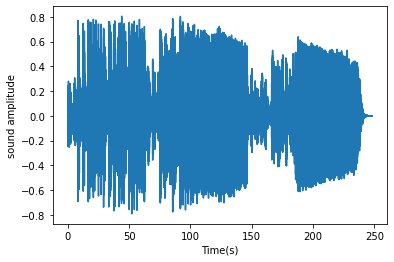

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr


audio='music_plot'
y, sr = lr.load('music.wav'.format(audio))
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

# Plotting and finding the estimating tempo

Parameters:

y: audio time series

sr: sampling rate of the time series

onset_envelope: pre-computed onset strength envelope

hop_length: hop length of the time series

start_bpm: initial guess of the BPM

std_bpm: standard deviation of tempo distribution

ac_size: length (in seconds) of the auto-correlation window

max_tempo: estimate tempo below this threshold

aggregate: for estimating global tempo. If None, then tempo is estimated independently for each frame.

In [8]:
# It will return tempo as an array
librosa.beat.tempo(y=y, sr=sr, onset_envelope=None, hop_length=512, start_bpm=120, std_bpm=1.0, ac_size=8.0)

array([117.45383523])

# PLOT A WAVE GRAPH

[117.45383523]


<ipython-input-38-0dab3bece8eb>:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tempo = np.asscalar(tempo)


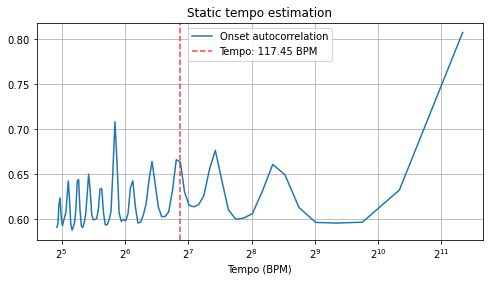

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr

audio='music'
y, sr = lr.load('music.wav'.format(audio))
onset_env = lr.onset.onset_strength(y, sr=sr)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = lr.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lr.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lr.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

# Finding pitch

In [16]:
pitch= librosa.core.piptrack(y=y, sr=sr, S=None, n_fft=2048, hop_length=None, fmin=150.0, fmax=4000.0, threshold=0.1, win_length=None, window='hann', center=True, pad_mode='reflect', ref=None)
print(pitch)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))


# Plotting pitch

pitches: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
magnitudes: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


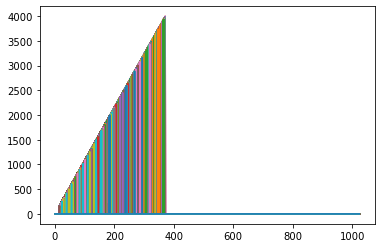

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr
from IPython.display import Audio

audio='music'
y, sr = lr.load('music.wav'.format(audio))
pitches, magnitudes = lr.piptrack(y=y, sr=sr)
print("pitches:",pitches)
print('///')
print('magnitudes:',magnitudes)
#plt.subplot(212)
#plt.show()
plt.plot(pitches)
plt.show()

# Compute a mel-scaled spectrogram

In [23]:
librosa.feature.melspectrogram(y=y, sr=sr, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', power=2.0)

array([[3.8010001e-04, 1.7557809e-03, 6.4298458e-02, ..., 2.4904382e-06,
        1.4505901e-08, 0.0000000e+00],
       [3.6075982e-04, 8.2162824e-03, 3.0139193e-01, ..., 6.3477769e-06,
        1.7653138e-08, 0.0000000e+00],
       [4.5572809e-04, 2.9715661e-02, 3.8091296e-01, ..., 3.7793559e-06,
        2.0148462e-08, 0.0000000e+00],
       ...,
       [1.8215309e-06, 1.1219003e-05, 1.0473247e-04, ..., 1.3538745e-09,
        2.1726414e-12, 0.0000000e+00],
       [1.8526038e-07, 5.3441536e-06, 3.8790953e-05, ..., 9.6538033e-10,
        2.5848906e-12, 0.0000000e+00],
       [6.1802204e-08, 4.5696774e-07, 2.8836132e-06, ..., 1.7349192e-10,
        3.5071100e-13, 0.0000000e+00]], dtype=float32)

# Plot a mel_scaled spectogram

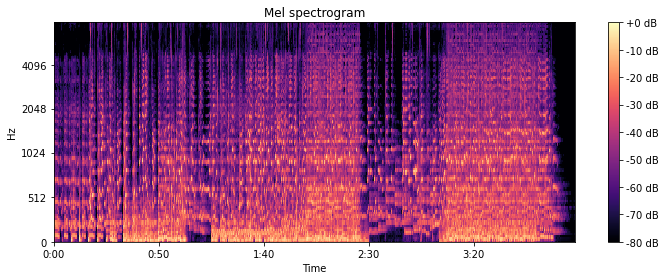

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr
import librosa.display
audio='music'
y, sr = lr.load('music.wav'.format(audio))
lr.feature.melspectrogram(y=y, sr=sr)

D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


# Time-stretch an audio series by a fixed rate


In [35]:
librosa.effects.time_stretch(y, rate=1)

array([-1.6017531e-09, -6.0623040e-10,  3.6441898e-09, ...,
       -3.5222274e-07, -4.7938391e-07, -5.5532377e-07], dtype=float32)

# Plot audio series by fixed rate

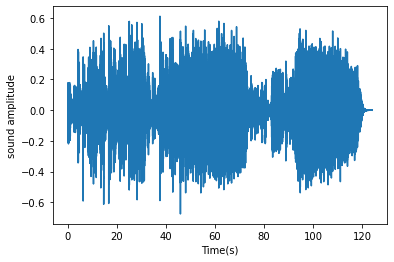

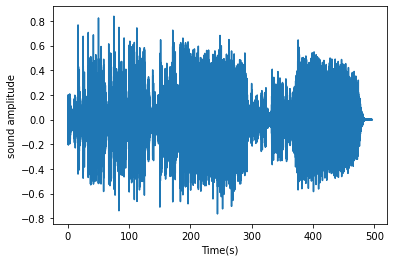

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr

audio='music'
y, sr = lr.load('music.wav'.format(audio))
y_fast = lr.effects.time_stretch(y, 2.0)
time = np.arange(0,len(y_fast))/sr
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = lr.effects.time_stretch(y, 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

# Remix an audio signal by re-ordering time intervals


In [34]:
librosa.effects.remix(y, intervals[1:-1], align_zeros=True)

array([0.01543359, 0.02240138, 0.03290114, ..., 0.04486125, 0.03924573,
       0.01707688], dtype=float32)

# plot remix audio siginal by time intervals

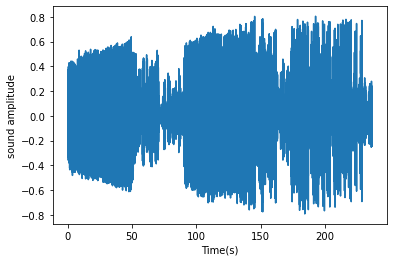

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr

audio='music'
y, sr = lr.load('music.wav'.format(audio))
_, beat_frames = lr.beat.beat_track(y=y, sr=sr,hop_length=512)
beat_samples = lr.frames_to_samples(beat_frames)
intervals = lr.util.frame(beat_samples, frame_length=2,hop_length=1).T
y_out = lr.effects.remix(y, intervals[::-1])
time = np.arange(0,len(y_out))/sr
fig, ax = plt.subplots()
ax.plot(time,y_out)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()